<a href="https://colab.research.google.com/github/plocobio/youtube_channel/blob/main/Ajuste_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chi2, linregress

In [44]:
# Abre el archivo en modo de lectura
x, dx, y, dy = np.loadtxt("minimos cuadrados.txt", unpack=True)

In [45]:
def funcion_Ajuste(x,a,b):
  return a*x + b

In [82]:
parametros, errores = curve_fit(funcion_Ajuste, x, y)

errores = np.sqrt(np.diag(errores))
print(parametros)
print(errores)


[   0.56932418 -320.45097967]
[0.01328011 8.13632253]


In [83]:
# Realiza el ajuste lineal
pendiente, term_indep, r_value, p_value, std_err = linregress(x, y)

# Calcula el valor de chi cuadrado observado
num_parametros_ajuste = 2
y_pred = pendiente * x + term_indep
residuos = y - y_pred
varianza_residuos = np.var(residuos)
grados_libertad = len(x) - num_parametros_ajuste - 1
chi2_obs = sum(residuos**2 / varianza_residuos)

# Calcula el valor teórico de chi cuadrado
nivel_significancia = 0.05
chi2_teo = chi2.ppf(1 - nivel_significancia, grados_libertad)

# Imprime los resultados
print("Valor de chi cuadrado observado:", chi2_obs)
print("Valor de chi cuadrado teórico:", chi2_teo)

if chi2_obs > chi2_teo:
    print("El ajuste lineal no es significativo al", nivel_significancia*100, "% con un coeficiente r: " , r_value)
else:
    print("El ajuste lineal es significativo al", nivel_significancia*100, "% con un coeficiente r: " , r_value)

Valor de chi cuadrado observado: 11.0
Valor de chi cuadrado teórico: 15.50731305586545
El ajuste lineal es significativo al 5.0 % con un coeficiente r:  0.9975604761383139


In [79]:
def plot_ajuste(y, dy, x, dx, pendiente, term_indep, xlabel="", ylabel=""):
      
    # Creación de la figura
    fig, ax = plt.subplots()
    
    # Gráfico de las medidas con barras de error
    ax.errorbar(x, y, xerr=dx, yerr=dy, fmt='.', label="Medidas", linewidth=2)
    
    # Gráfico de la recta de ajuste
    x_line = np.linspace(min(x), max(x), 100)
    y_line = pendiente * x_line + term_indep
    ax.plot(x_line, y_line, "r--", label="Ajuste lineal")
    
    # Configuración de los ejes y la leyenda
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
      
    plt.show()


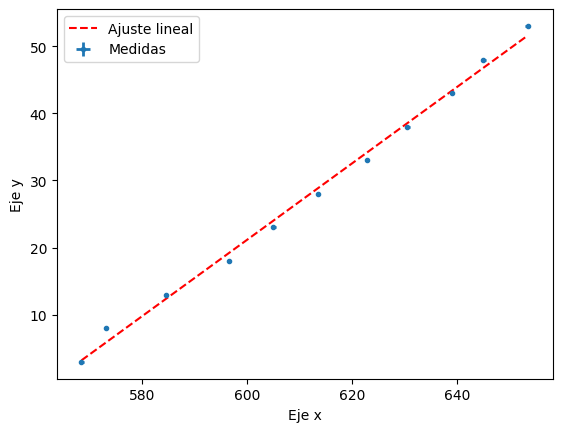

In [80]:
plot_ajuste(y, dy, x, dx, pendiente, term_indep, "Eje x", "Eje y")
